## Libraries importation

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from pprint import pprint

## Lecture of file

In [220]:
train_data = pd.read_csv("train.csv")
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Feature Engineering

### Ticket

In [221]:
print(train_data["Ticket"].unique()[0:30])

"""
It can be seen that the structure of the entire strings is that (in some cases) it appears text with numbers 
(Iy may not be the case tough) and then an space and numbers (This is for sure) then we could proceed to create a columns with that 
first substring of the entire string and then the numbers
"""

def getLeftSubstring(row):
    if len(row.split()) == 1 and not (row == "LINE"):
        return np.nan
    elif len(row.split()) == 3:
        return row.split()[0] + row.split()[1]
    elif row == "LINE":
        return row
    else:
        return row.split()[0]

def getRightSubstring(row):
    if len(row.split()) == 1 and not (row == "LINE"):
        return row
    elif len(row.split()) == 3:
        return row.split()[2]
    elif row == "LINE":
        return "0"
    else:
        return row.split()[1]
    
train_data["Ticket_Left_Substring"] = train_data["Ticket"].apply(getLeftSubstring)
train_data["Ticket_Right_Substring"] = train_data["Ticket"].apply(getRightSubstring)

# A conversion is made based on what it should be by looking at the strings (integer)

train_data["Ticket_Right_Substring"] = train_data["Ticket_Right_Substring"].astype(int)

train_data

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Left_Substring,Ticket_Right_Substring
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A/5,21171
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,PC,17599
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,STON/O2.,3101282
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN,113803
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN,211536
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,NaN,112053
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,W./C.,6607
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,NaN,111369


### Name

In [222]:
print(train_data["Name"].unique()[0:10]) # It can be seen that after the commas it appears the nicknames of the persons

train_data["Nickname"] = train_data["Name"].str.extract(", ([a-zA-Z\s]*)\. ")
print(train_data["Nickname"].isnull().sum()) # There are not null values
print(train_data["Nickname"].unique()) #There are the nicknames

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)']
0
['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [223]:
# Deleting columns who were modified

train_data.drop(columns = ["Name", "Ticket"], inplace = True)

## Feature Selection

In [224]:
# Check for number of null values in each feature in dataframe
train_data.isnull().sum()

PassengerId                 0
Survived                    0
Pclass                      0
Sex                         0
Age                       177
SibSp                       0
Parch                       0
Fare                        0
Cabin                     687
Embarked                    2
Ticket_Left_Substring     661
Ticket_Right_Substring      0
Nickname                    0
dtype: int64

In [225]:
# Deletion of Cabin and Ticket_Left_Substring due to the big amount of null values. On the other hand Sex column doesn't have too much missing values
train_data.drop(columns = ["Cabin", "Ticket_Left_Substring"], inplace = True)

# Inferential analysis

### Categorical Variables

In [228]:
categorical = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Nickname"]
p_values_list = []

for category in categorical:
    table = pd.crosstab(train_data["Survived"], train_data[category],  margins = True)
    stat, p, dof, expected = chi2_contingency(table)
    p_values_list.append(p)

dictionary = sorted(dict(zip(categorical, p_values_list)).items(), key=lambda item: item[1])
pprint(dictionary)

# All of them are important variables, they are order from the most important to the lowest

[('Sex', 1.0036732821369115e-55),
 ('Nickname', 2.4934718953495015e-44),
 ('Pclass', 6.258462423531468e-20),
 ('Embarked', 0.00018045058101554096),
 ('SibSp', 0.0006709654974933448),
 ('Parch', 0.014554047586837711)]


### Continuos Variables

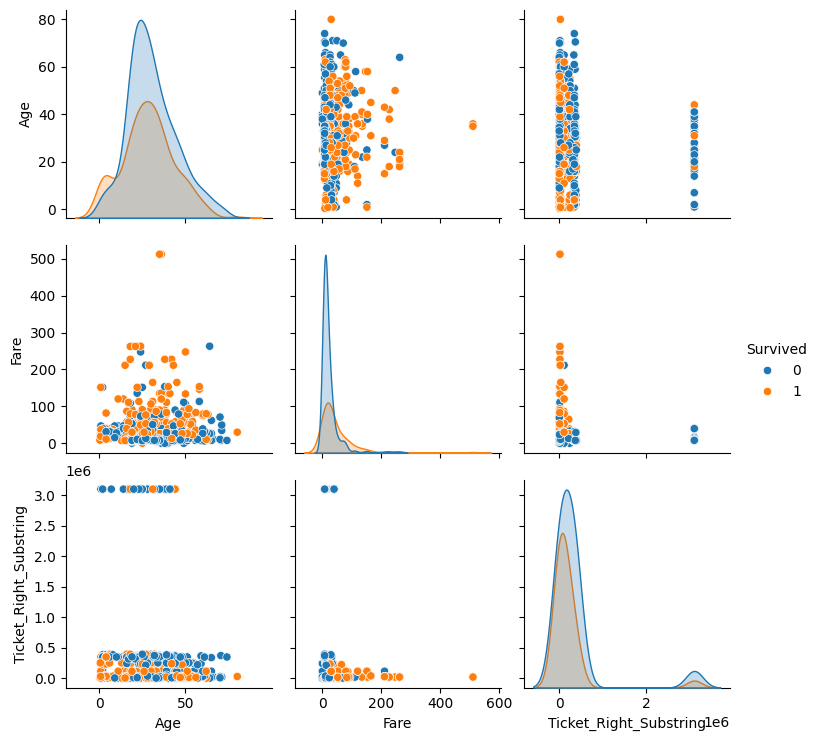

In [229]:
continuos = ["Survived", "Age", "Fare", "Ticket_Right_Substring"]

continuos_table = train_data[continuos]
sns.pairplot(data = continuos_table, hue="Survived")

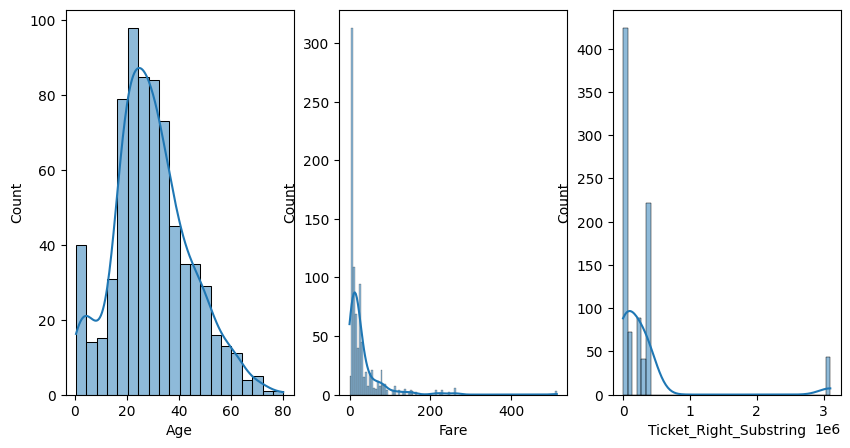

In [230]:
fig, axs = plt.subplots(1,3, figsize=(10, 5))

for i in range (0,3):
    sns.histplot(data = continuos_table[continuos[i+1]], kde = True, ax = axs[i])

In [206]:
null_Age_Values = continuos_table[continuos_table["Age"].isnull()]
grouping = null_Age_Values.groupby("Survived")
Age0 = grouping.groups[0]
Age1 = grouping.groups[1]

In [207]:
from sklearn.impute import SimpleImputer

# Mode is being used in "0" data from Survived data, it ie seen by graph that with "Age" column it presents skewness and no symmetry,
# so using the mode with preserve that, while using mean for "1" data will preserve the symmetry.

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
mode = imp_mode.fit(train_data.query('Survived == 0').Age)
mean = imp_mean.fit(train_data.query('Survived == 1').Age)

mode.transform(Age0)
mean.transform(Age1)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

### Convertion to categorical variables